<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder, DatasetFolder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

print(device)

## Training을 위한 데이터로더를 정의하고 확인하기

In [ ]:
path0 = '.'
transform = transforms.Compose(
    [transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(path0, train=True, transform=transform, target_transform=None, download=True)
mnist_valid = torchvision.datasets.MNIST(path0, train=False, transform=transform, target_transform=None, download=True)
def get_mnist_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

# defining data_iter, linreg. model, loss, sgd
batch_size = 100
num_workers = 0
train_iter = DataLoader(mnist_train, batch_size, shuffle=True, num_workers=num_workers)
valid_iter = DataLoader(mnist_valid, batch_size, shuffle=False, num_workers=num_workers)

In [6]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
mnist_valid

Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

torch.Size([100])
torch.Size([100, 1, 28, 28])


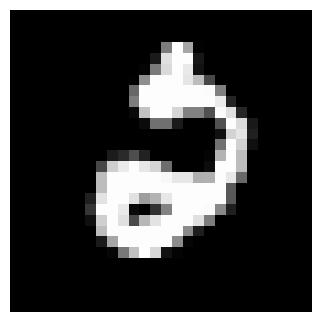

['2']


In [8]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0].numpy()
plt.figure(dpi=100)

plt.imshow(I[0],cmap='gray')
plt.axis('off')
plt.show()
print(get_mnist_labels([labels[0]]))

## CNN model을 정의하기

In [9]:
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=16*5*5, out_features=120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
X = torch.randn(size=(1,1,28,28), dtype = torch.float32)
X = X.to(device)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


## Hyper parameter들을 설정하기

In [11]:
# setting hyper-parameters
learning_rate = 0.8
num_epochs = 30

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

## Model 학습시키기

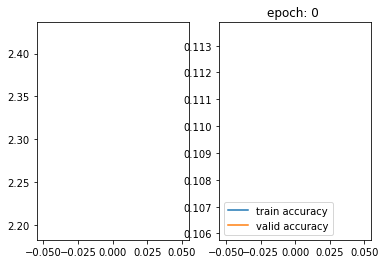

train loss:  2.3094301350911457 train accuracy:  0.10613333433866501 valid accuracy:  0.11349999904632568


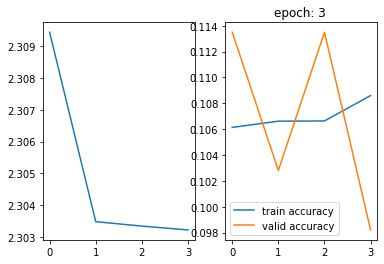

train loss:  2.3032257080078127 train accuracy:  0.10859999805688858 valid accuracy:  0.0982000008225441


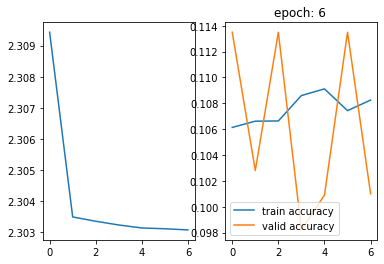

train loss:  2.3030668131510414 train accuracy:  0.10824999958276749 valid accuracy:  0.10100000351667404


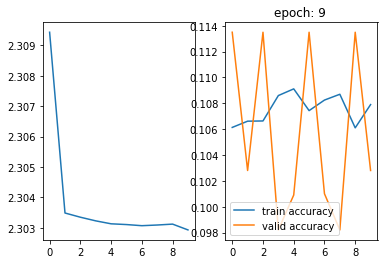

train loss:  2.3029278564453124 train accuracy:  0.10790000110864639 valid accuracy:  0.10279999673366547


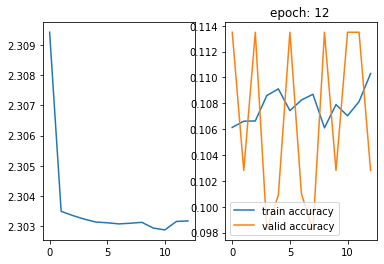

train loss:  2.3031658935546875 train accuracy:  0.11029999703168869 valid accuracy:  0.10279999673366547


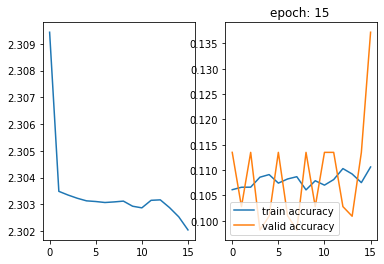

train loss:  2.3020424397786456 train accuracy:  0.11061666905879974 valid accuracy:  0.1371999979019165


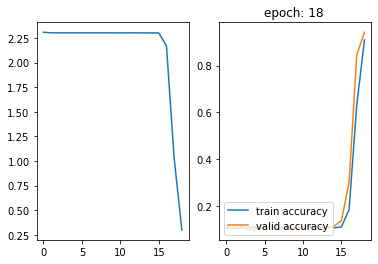

train loss:  0.2983661397298177 train accuracy:  0.909583330154419 valid accuracy:  0.9424999952316284


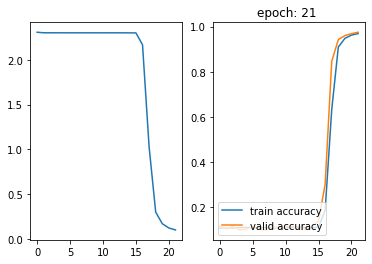

train loss:  0.09920377095540364 train accuracy:  0.9691166877746582 valid accuracy:  0.9750999808311462


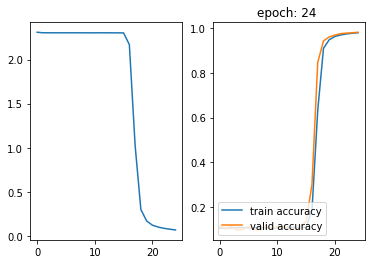

train loss:  0.06679503758748373 train accuracy:  0.978950023651123 valid accuracy:  0.9811999797821045


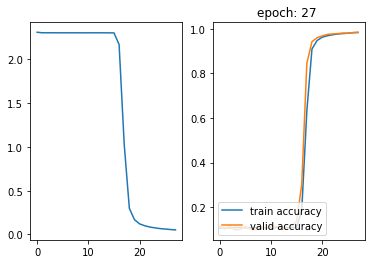

train loss:  0.0516424306233724 train accuracy:  0.9836999773979187 valid accuracy:  0.9848999977111816


In [12]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device) # GPU 
    y_hat=net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,correct.cpu()/60000.)

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()

  accs_valid = np.append(accs_valid,correct.cpu()/10000.)

  if epoch%3 == 0:
    plt.subplot(121)
    plt.plot(loss_train,label='train loss')
    plt.subplot(122)
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.show()

  print('train loss: ',loss_train[-1],'train accuracy: ',accs_train[-1],'valid accuracy: ',accs_valid[-1])

## Validation Set에 대한 결과 확인하기

In [15]:
y_all=[]
y_hat_all=[]

In [16]:
i = 0
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
  y_hat = y_hat.argmax(dim=1)
  y_all.append(y)
  y_hat_all.append(y_hat)

In [17]:
y_all = torch.cat(y_all,dim=0)
y_hat_all = torch.cat(y_hat_all,dim=0)

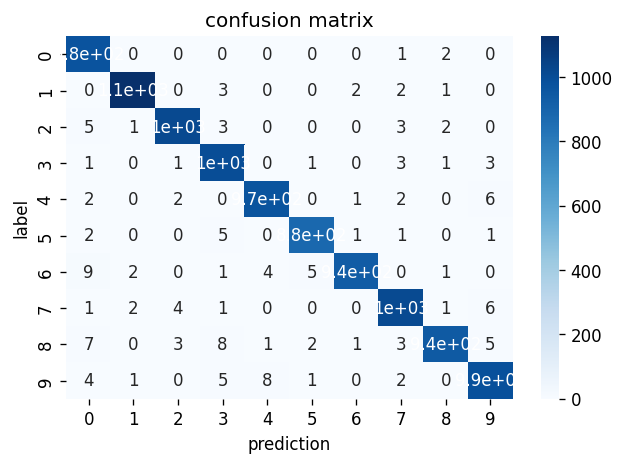

In [18]:
cf = confusion_matrix(y_all.numpy(),y_hat_all.numpy())
plt.figure(dpi=120)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('confusion matrix')
plt.ylabel('label')
plt.xlabel('prediction')
plt.show()

## TEST를 위한 데이터로더를 정의하고 확인하기

In [19]:
transform_test = transforms.Compose(
    [
        transforms.Grayscale(),
        transforms.Resize((28,28)),
        transforms.ToTensor()
    ])

In [20]:
path_test = '/content/drive/MyDrive/data/hufs_mnist_png/testing1' # replace with your path
data_test = ImageFolder(root=path_test,transform=transform_test)

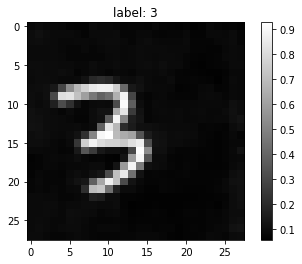

In [21]:
n=72
plt.imshow(data_test[n][0][0],cmap='gray')
plt.title(f'label: {data_test[n][1]}')
plt.colorbar()
plt.show()

In [22]:
#len(data_test)
results = np.zeros((2,len(data_test)))

In [23]:
num_incorrect = 0
flag_plot = 0
for n in range(len(data_test)):
  X = data_test[n][0].unsqueeze(0)
  y = data_test[n][1]
  y_hat = net(X.to(device))    
  y_hat = y_hat.argmax(dim=1)

  results[0,n] = y
  results[1,n] = y_hat
  if y_hat != y:
    num_incorrect+=1
    
    if flag_plot == 1:
      plt.figure(dpi=80)
      plt.imshow(X[0].cpu().squeeze(),cmap='gray')
      plt.title('label: %s \n prediction: %s'%(get_mnist_labels([y]),get_mnist_labels([y_hat])))
      plt.axis('off')
      plt.show()

acc = 100*(len(data_test)-num_incorrect)/len(data_test)
print(f'accuracy: {acc}')

accuracy: 47.36842105263158


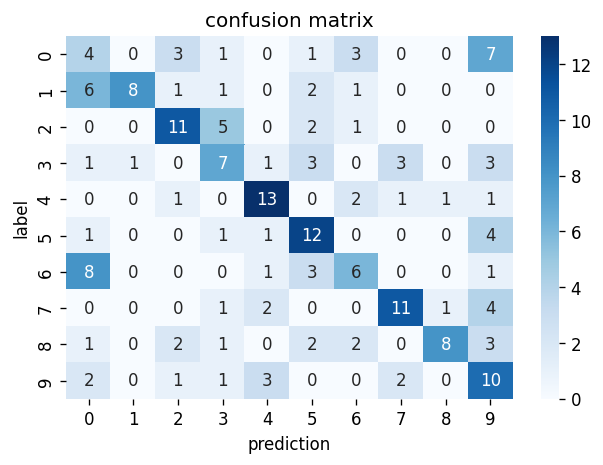

In [24]:
cf = confusion_matrix(results[0,:],results[1,:])
plt.figure(dpi=120)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('confusion matrix')
plt.ylabel('label')
plt.xlabel('prediction')
plt.show()